## 1.数据读取

In [1]:
import pandas as pd

df_2018 = pd.read_excel('2018年决赛正式结果.xlsx', sheet_name='123等奖')
df_2019 = pd.read_excel('2019年大赛获奖作品名单公示20190907.xlsx')

In [2]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   奖级      2567 non-null   int64 
 1   奖项      2567 non-null   object
 2   大类      2567 non-null   object
 3   作品编号    2567 non-null   int64 
 4   作品名称    2567 non-null   object
 5   参赛学校    2567 non-null   object
 6   省份      2567 non-null   object
 7   作者一     2567 non-null   object
 8   作者二     2370 non-null   object
 9   作者三     1975 non-null   object
 10  作者四     217 non-null    object
 11  作者五     154 non-null    object
 12  指导教师一   2560 non-null   object
 13  指导教师二   1535 non-null   object
dtypes: int64(2), object(12)
memory usage: 280.9+ KB


In [3]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   奖项名称    3653 non-null   object
 1   大类      3653 non-null   object
 2   作品编号    3653 non-null   int64 
 3   作品名称    3653 non-null   object
 4   参赛学校    3653 non-null   object
 5   作者      3653 non-null   object
 6   指导教师    3631 non-null   object
dtypes: int64(1), object(6)
memory usage: 199.9+ KB


In [4]:
import pdfplumber

def read_pdf_2020(read_path):
    pdf_2020 = pdfplumber.open(read_path)
    result_df = pd.DataFrame()
    for page in pdf_2020.pages:
        table = page.extract_table()
        df_detail = pd.DataFrame(table[1:], columns=table[0])
        # 合并每页的数据集
        result_df = pd.concat([df_detail, result_df], ignore_index=True)
    # 删除值全部是 NaN 的列
    result_df.dropna(axis=1, how='all', inplace=True)
    # 重置列名
    result_df.columns = ['奖项', '作品编号', '作品名称', '参赛学校', '作者', '指导老师']
    return result_df

df_2020 = read_pdf_2020('2020年中国大学生计算机设计大赛参赛作品获奖名单.pdf')

In [5]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   奖项      4083 non-null   object
 1   作品编号    4083 non-null   object
 2   作品名称    4083 non-null   object
 3   参赛学校    4083 non-null   object
 4   作者      4083 non-null   object
 5   指导老师    4083 non-null   object
dtypes: object(6)
memory usage: 191.5+ KB


## 2.数据预处理

In [6]:
# 2018年数据集处理
clean_df_2018 = df_2018.copy()
author_list = []
teacher_list = []
for index, row in clean_df_2018.iterrows():
    author = []
    for name in ['作者一', '作者二', '作者三', '作者四', '作者五']:
        if not pd.isnull(row[name]):
            author.append(row[name])
        else:
            break
    author_list.append('、'.join(author))
    teacher = []
    for name in ['指导教师一', '指导教师二']:
        if not pd.isnull(row[name]):
            teacher.append(row[name])
    teacher_list.append('、'.join(teacher))
    
clean_df_2018['作者'] = author_list
clean_df_2018['指导老师'] = teacher_list
clean_df_2018 = clean_df_2018.drop(labels=['奖级', '大类', '省份', '作者一', '作者二', '作者三', '作者四',
                        '作者五', '指导教师一', '指导教师二'], axis=1)
clean_df_2018['年份'] = [2018 for n in range(len(clean_df_2018))]
clean_df_2018.columns = ['奖项', '作品编号', '作品名称', '参赛学校', '作者', '指导老师', '年份']
clean_df_2018

,奖项,作品编号,作品名称,参赛学校,作者,指导老师,年份
0,一等奖,49444,Frisbeelove (feat. Cyano),华东师范大学,姚勐,戴李君,2018
1,一等奖,49591,黛帕,吉首大学,贺谭晶,苏蔚琦、杨波,2018
2,一等奖,49829,劫尘欲渡,四川音乐学院,朱镕辉,张旭鲲,2018
3,二等奖,49411,cream pie,广东外语外贸大学,张恒榕,胡春花,2018
4,二等奖,49418,快意东南行,东南大学,王翊尧,方方、陈伟,2018
...,...,...,...,...,...,...,...
2562,三等奖,49574,文字演变之十二生肖,西安培华学院,孙煜书、徐雪瑞、李帅康,万卷、黄玉蕾,2018
2563,三等奖,49599,视觉中药——中药药理智能学习系统,中国人民解放军海军军医大学,沈港旋、朱拯、于航,郑奋,2018
2564,三等奖,49613,初识数组,中国人民解放军海军航空大学,祁宇豪、薛浩林、王云鹤,赵海冰、邢翠芳,2018
2565,三等奖,49630,错的韵味,解放军空军航空大学,江泰圻、刘鑫、赵浩钦,张燕、孙琰,2018


In [7]:
# 2019年数据集处理
clean_df_2019 = df_2019.copy()
clean_df_2019['作者'] = clean_df_2019['作者'].apply(lambda x: '、'.join(x.split(',')))

for index, row in clean_df_2019.iterrows():
    if not pd.isnull(row['指导教师']):
        clean_df_2019['指导教师'][index] = row['指导教师'].replace(',', '、')
clean_df_2019['年份'] = [2019 for n in range(len(clean_df_2019))]
clean_df_2019.rename(columns={'奖项名称': '奖项', '指导教师': '指导老师'}, inplace=True)
clean_df_2019 = clean_df_2019.drop('大类', axis=1)
clean_df_2019

<ipython-input-7-da4e66476d05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_2019['指导教师'][index] = row['指导教师'].replace(',', '、')


,奖项,作品编号,作品名称,参赛学校,作者,指导老师,年份
0,一等奖,50356,中国法定传染病可视化分析系统,南京医科大学,卞子龙、孔梦梦、钱心瑶,张汝阳、胡晓雯,2019
1,一等奖,50679,大数据-学业管理系统,苏州科技大学,包雨杰、沈跃踞、张琳,陆悠、傅启明,2019
2,一等奖,53280,基于下肢深静脉血栓的全栈式诊疗系统,深圳大学,袁程朗、吴颖桐、罗梓欣,黄炳升,2019
3,一等奖,53774,地表水质监测的ES-Ensemble算法设计与应用方案论证报告,南京邮电大学,陈康扬、邹心怡,陈兴国,2019
4,一等奖,53797,基于多源医疗大数据的知识图谱构建与应用方案,南京邮电大学,马健、张嘉明、王舟,韩普,2019
...,...,...,...,...,...,...,...
3648,三等奖,67960,iStudy,华东理工大学,梁谦旺、魏苏航、周婧,胡庆春,2019
3649,三等奖,67961,基于Unity3D的裂解炉数据可视化,华东理工大学,杨路航、左稳、陈中庆,胡贵华、万锋,2019
3650,三等奖,67962,LycheeRMS,华东理工大学,梁伟、韩志彦、陈浩,杨泽平,2019
3651,三等奖,67975,河南科技学院校史馆虚拟场景漫游,河南科技学院,韩利、王梦月、张延丽,张培,2019


In [8]:
# 2020年数据集处理
clean_df_2020 = df_2020.copy()

# 部分信息过长导致在分页处被分割，分别出现在两页上，下面将奖项为空的数据添加到上一条数据的信息中。
clean_df_2020.iloc[609]['参赛学校'] += '医大学'
clean_df_2020.iloc[1330]['作品名称'] += '丹霞'
clean_df_2020.iloc[2121]['作品名称'] += '现'
clean_df_2020.iloc[2997]['作品名称'] += '云平台'

del_index = clean_df_2020.loc[clean_df_2020['奖项'] == ''].index
clean_df_2020.drop(del_index, inplace=True)
clean_df_2020.reset_index(drop=True, inplace=True)
clean_df_2020['年份'] = [2020 for _ in range(len(clean_df_2020))]

In [9]:
# 合并三年的数据
all_df = pd.concat([clean_df_2018, clean_df_2019, clean_df_2020], ignore_index=True)
all_df['参赛学校'] = all_df['参赛学校'].str.replace('(', '（')
all_df['参赛学校'] = all_df['参赛学校'].str.replace(')', '）')
all_df

,奖项,作品编号,作品名称,参赛学校,作者,指导老师,年份
0,一等奖,49444,Frisbeelove (feat. Cyano),华东师范大学,姚勐,戴李君,2018
1,一等奖,49591,黛帕,吉首大学,贺谭晶,苏蔚琦、杨波,2018
2,一等奖,49829,劫尘欲渡,四川音乐学院,朱镕辉,张旭鲲,2018
3,二等奖,49411,cream pie,广东外语外贸大学,张恒榕,胡春花,2018
4,二等奖,49418,快意东南行,东南大学,王翊尧,方方、陈伟,2018
...,...,...,...,...,...,...,...
10294,一等奖,69553,基于区块链的可溯源基金会运营平台,广东科技学院,岑东桦、黎智健、黄鉴熙,黄欣欣,2020
10295,一等奖,69933,拾遗,南京医科大学,唐依宁、孙汉垚、徐芊昊,胡晓雯、刘潋,2020
10296,一等奖,69934,幽兰静绽 水磨传馨,南京医科大学,孙汉垚、姚晟昊、钱子凌、唐依宁、邓彧,施广楠、胡晓雯,2020
10297,一等奖,69938,走近丹顶鹤,南京医科大学,谷越、冯雨萱、宋昱颖、王一、赵冠杰,丁贵鹏、胡晓雯,2020


In [11]:
college_info = pd.read_csv('college_info.csv')
college_name = college_info['学校名称'].values.tolist()
college_level = []
for college in all_df['参赛学校']:
    if college not in college_name:
        college_level.append('暂无数据')
    else:
        college_level.append(college_info['学校层次'][college_name.index(college)])
all_df['学校层次'] = college_level
all_df['参赛学校'] = all_df['参赛学校'].str.replace('\n|\r', '')
all_df['作品名称'] = all_df['作品名称'].str.replace('\n|\r', '')

# 删除作者为空的列
all_df.dropna(subset=['作者'], axis=0, inplace=True)
# 添加 参数人数 列来记录各作品作者人数
all_df['参赛人数'] = all_df['作者'].apply(lambda x: len(x.split('、')))
count_list = []
for index, row in all_df.iterrows():
    try:
        count_list.append(len(row['指导老师'].split('、')))
    except:
        count_list.append(0)
all_df['指导老师人数'] = count_list

all_df.to_csv('all_df.csv', index=False)
all_df

,奖项,作品编号,作品名称,参赛学校,作者,指导老师,年份,学校层次,参赛人数,指导老师人数
0,一等奖,49444,Frisbeelove (feat. Cyano),华东师范大学,姚勐,戴李君,2018,985 211,1,1
1,一等奖,49591,黛帕,吉首大学,贺谭晶,苏蔚琦、杨波,2018,普通本科,1,2
2,一等奖,49829,劫尘欲渡,四川音乐学院,朱镕辉,张旭鲲,2018,普通本科,1,1
3,二等奖,49411,cream pie,广东外语外贸大学,张恒榕,胡春花,2018,普通本科,1,1
4,二等奖,49418,快意东南行,东南大学,王翊尧,方方、陈伟,2018,985 211,1,2
...,...,...,...,...,...,...,...,...,...,...
10294,一等奖,69553,基于区块链的可溯源基金会运营平台,广东科技学院,岑东桦、黎智健、黄鉴熙,黄欣欣,2020,普通本科,3,1
10295,一等奖,69933,拾遗,南京医科大学,唐依宁、孙汉垚、徐芊昊,胡晓雯、刘潋,2020,普通本科,3,2
10296,一等奖,69934,幽兰静绽 水磨传馨,南京医科大学,孙汉垚、姚晟昊、钱子凌、唐依宁、邓彧,施广楠、胡晓雯,2020,普通本科,5,2
10297,一等奖,69938,走近丹顶鹤,南京医科大学,谷越、冯雨萱、宋昱颖、王一、赵冠杰,丁贵鹏、胡晓雯,2020,普通本科,5,2


## 各年奖项数量分布

In [12]:
list1 = []    # 三等奖
list2 = []    # 二等奖
list3 = []    # 一等奖
for year in [2018, 2019, 2020]:
    value_count = all_df.loc[all_df['年份'] == year]['奖项'].value_counts()
    all_count = value_count.values.sum()
    list1.append({'value': int(value_count['三等奖']), 'percent': float(value_count['三等奖'] / all_count)})
    list2.append({'value': int(value_count['二等奖']), 'percent': float(value_count['二等奖'] / all_count)})
    list3.append({'value': int(value_count['一等奖']), 'percent': float(value_count['一等奖'] / all_count)})

from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

c = Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
c.add_xaxis([2018, 2019, 2020])
c.add_yaxis("三等奖", list1, stack="stack1", category_gap="70%")
c.add_yaxis("二等奖", list2, stack="stack1", category_gap="70%")
c.add_yaxis("一等奖", list3, stack="stack1", category_gap="70%")
c.set_series_opts(label_opts=opts.LabelOpts(
                    position="right",
                    formatter=JsCode(
                        "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
                    ),
                )
            )
c.render("./images/各年奖项数量分布堆叠条形图.html")
c.render_notebook()

## 各年得奖最多的学校Top10

In [13]:
def get_bar(year):
    detail_df = all_df.loc[all_df['年份'] == year]
    school_count = detail_df['参赛学校'].value_counts()[:10]
    name_list = school_count.index.tolist()
    list1 = []
    list2 = []
    list3 = []
    for name in name_list:
        price_count = detail_df.loc[detail_df['参赛学校'] == name, '奖项'].value_counts()
        # 若没有一等奖就填0
        try:
            list1.append(int(price_count['一等奖']))
        except:
            list1.append(0)
        list2.append(int(price_count['二等奖']))
        list3.append(int(price_count['三等奖']))

    bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
    bar.add_xaxis(xaxis_data=name_list)
    bar.add_yaxis(
            series_name="一等奖",
            y_axis=list1,
            is_selected=True,
            label_opts=opts.LabelOpts(is_show=True),
        )
    bar.add_yaxis(
            series_name="二等奖",
            y_axis=list2,
            is_selected=True,
            label_opts=opts.LabelOpts(is_show=True),
        )
    bar.add_yaxis(
            series_name="三等奖",
            y_axis=list3,
            is_selected=True,
            label_opts=opts.LabelOpts(is_show=True),
        )
    bar.set_global_opts(
            title_opts=opts.TitleOpts(
                title="{}获奖做最多的学校Top10".format(year)
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True, trigger="axis", axis_pointer_type="shadow"
            ),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(interval=0))
        )
    return bar

from pyecharts.charts import Timeline

bar = get_bar(2018)
bar.render_notebook()

# 生成时间轴的图
timeline = Timeline(init_opts=opts.InitOpts(width="1500px", height="700px", theme=ThemeType.CHALK))

for y in range(2018, 2021):
    timeline.add(get_bar(year=y), time_point=str(y))

# 1.0.0 版本的 add_schema 暂时没有补上 return self 所以只能这么写着
timeline.add_schema(is_auto_play=True, play_interval=3000)
timeline.render("./images/各年得奖最多的学校Top10.html")
timeline.render_notebook()

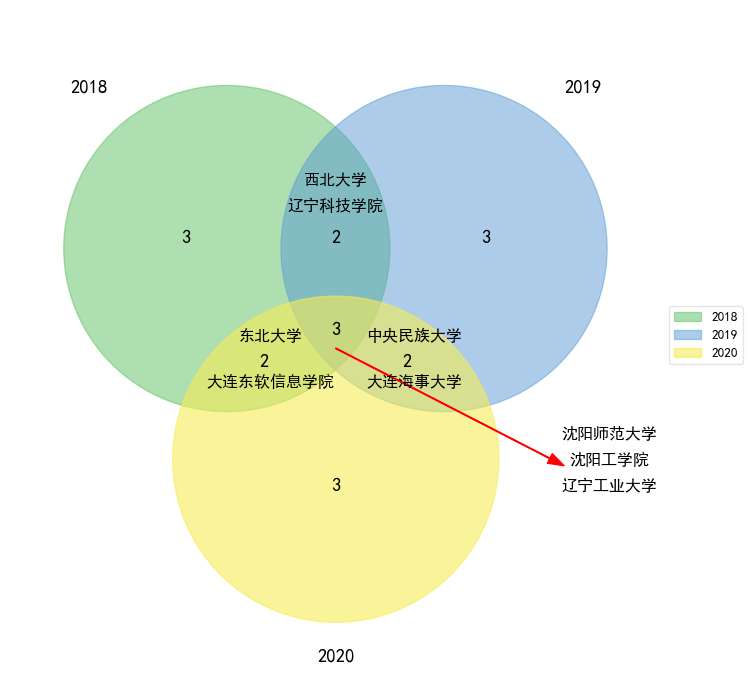

In [14]:
import sys
sys.path.append(r'C:\Users\pc\pyvenn')
import venn
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
all_name_list = []
for year in [2018, 2019, 2020]:
    detail_df = all_df.loc[all_df['年份'] == year]
    school_count = detail_df['参赛学校'].value_counts()[:10]
    all_name_list.append(school_count.index.tolist())

labels = venn.get_labels(all_name_list, fill=['number'])
fig, ax = venn.venn3(labels, names=['2018', '2019', '2020'])

venn.draw_annotate(fig, ax, x=0.85, y=0.3,    #箭头的位置
                   textx=0.5, texty=0.48,     #箭尾的位置
                   text='', color='r',        #注释文本属性
                   arrowcolor='r',            #箭头的颜色等属性
                  )
venn.draw_text(fig, ax, x=0.92, y=0.27, text='辽宁工业大学',
               fontsize=12, ha='center', va='center')
venn.draw_text(fig, ax, x=0.92, y=0.31, text='沈阳工学院',
               fontsize=12, ha='center', va='center')
venn.draw_text(fig, ax, x=0.92, y=0.35, text='沈阳师范大学',
               fontsize=12, ha='center', va='center')

venn.draw_text(fig, ax, x=0.5, y=0.7, text='辽宁科技学院',
               fontsize=12, ha='center', va='center')
venn.draw_text(fig, ax, x=0.5, y=0.74, text='西北大学',
               fontsize=12, ha='center', va='center')

venn.draw_text(fig, ax, x=0.40, y=0.50, text='东北大学',
               fontsize=12, ha='center', va='center')
venn.draw_text(fig, ax, x=0.40, y=0.43, text='大连东软信息学院',
               fontsize=12, ha='center', va='center')

venn.draw_text(fig, ax, x=0.62, y=0.50, text='中央民族大学',
               fontsize=12, ha='center', va='center')
venn.draw_text(fig, ax, x=0.62, y=0.43, text='大连海事大学',
               fontsize=12, ha='center', va='center')
plt.savefig('./images/各年得奖最多Top10韦恩图.jpg', dpi=600)

## 各学校参加次数统计

In [15]:
from collections import Counter
all_school = []
for year in [2018, 2019, 2020]:
    school_set = set(all_df.loc[all_df['年份'] == year, '参赛学校'].values.tolist())
    all_school += list(school_set)
value_count = Counter(all_school)
count_list = ['参赛' + str(n) + '次' for n in value_count.values()]
counter = Counter(count_list)

from pyecharts.charts import Pie

c = Pie(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
c.add("", [list(z) for z in zip(counter.keys(), counter.values())])
c.set_global_opts(title_opts=opts.TitleOpts(title="各学校参加次数统计饼图"))
c.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
c.render("./images/各学校参加次数统计饼图.html")
c.render_notebook()

## 各级别奖项中学校层次划分

In [16]:
i = 0
year_list = [2018, 2019, 2020]
level_list = list(set(all_df['学校层次'].values.tolist()))
level_list = ['专科（高职）', '暂无数据', '985 211', '211', '普通本科']
data = []
for x in range(len(year_list)):
    level_count = all_df.loc[all_df['年份'] == year_list[x], '学校层次'].value_counts()
    for y in range(len(level_list)):
        try:
            data.append([x, y, int(level_count[level_list[y]])])
        except:
            data.append([x, y, 0])

# data = [[d[1], d[0], d[2]] for d in data]

from pyecharts.charts import Bar3D

c = Bar3D(init_opts=opts.InitOpts(width="1500px", height="700px"))
c.add(
    series_name="",
    data=data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=year_list),
    yaxis3d_opts=opts.Axis3DOpts(type_="category", data=level_list),
    zaxis3d_opts=opts.Axis3DOpts(type_="value"),
)
c.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(
        max_=3100,
        range_color=[
            "#313695",
            "#4575b4",
            "#74add1",
            "#abd9e9",
            "#e0f3f8",
            "#ffffbf",
            "#fee090",
            "#fdae61",
            "#f46d43",
            "#d73027",
            "#a50026",
        ],
    )
)
c.render("./images/各级别奖项中学校层次划分3D柱状图.html")
c.render_notebook()

## 参赛人数与奖项分布

In [17]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Timeline

def get_reverse_bar(price):
    combination = []    # 参赛人数和指导老师人数组合
    count_list = []
    for count in range(1, 6):
        value_count = all_df.loc[(all_df['奖项'] == price) & (all_df['参赛人数'] == count), '指导老师人数'].value_counts()
        for index, value in value_count.items():
            combination.append('作者' + str(count) + '人'+ '老师' + str(index) + '人')
            count_list.append(int(value))
    res = sorted(zip(combination, count_list), key=lambda x:x[1], reverse=False)
    combination = [k for k, v in res]
    count_list = [v for k, v in res]
    c = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
        .add_xaxis(combination)
        .add_yaxis(price, count_list)
        .reversal_axis()
        .set_series_opts(label_opts=opts.LabelOpts(position="right"))
        .set_global_opts(title_opts=opts.TitleOpts(title=price + "参赛规模与数量"))
    )
    return c

# 生成时间轴的图
timeline = Timeline(init_opts=opts.InitOpts(width="1500px", height="700px", theme=ThemeType.CHALK))
from pyecharts.faker import Faker


price_list = ['一等奖', '二等奖', '三等奖']
for price in price_list:
    timeline.add(get_reverse_bar(price), time_point=price)

# 1.0.0 版本的 add_schema 暂时没有补上 return self 所以只能这么写着
timeline.add_schema(is_auto_play=True, play_interval=3000)
timeline.render("./images/参赛人数与奖项分布.html")
timeline.render_notebook()

## 获奖作品名称热词

In [18]:
def load_stopwords(read_path):
    '''
    读取文件每行内容并保存到列表中
    :param read_path: 待读取文件的路径
    :return: 保存文件每行信息的列表
    '''
    result = []
    with open(read_path, "r", encoding='utf-8') as f:
        for line in f.readlines():
            line = line.strip('\n')  # 去掉列表中每一个元素的换行符
            result.append(line)
    return result

# 加载中文停用词
stopwords = load_stopwords('wordcloud_stopwords.txt')

In [19]:
import jieba

# 添加自定义词典
jieba.load_userdict("自定义词典.txt")

token_list = []
# 对标题内容进行分词，并将分词结果保存在列表中
for name in all_df['作品名称']:
    tokens = jieba.lcut(name, cut_all=False)
    token_list += [token for token in tokens if token not in stopwords]
len(token_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\pc\AppData\Local\Temp\jieba.cache
Loading model cost 1.128 seconds.
Prefix dict has been built successfully.


39312

In [20]:
from pyecharts.charts import WordCloud
from collections import Counter

token_count_list = Counter(token_list).most_common(100)
new_token_list = []
for token, count in token_count_list:
    new_token_list.append((token, str(count)))

c = WordCloud()   
c.add(series_name="热词", data_pair=new_token_list, word_size_range=[20, 200])
c.set_global_opts(
    title_opts=opts.TitleOpts(
        title="获奖作品热词", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
    ),
    tooltip_opts=opts.TooltipOpts(is_show=True),
)
c.render("./images/获奖作品热词.html")
c.render_notebook()